<a href="https://colab.research.google.com/github/ToaiDinh/ANN_AI/blob/main/CNN_Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.datasets import cifar100
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Activation,Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop,Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
print("x train shape: ",x_train.shape)
print("y train shape: ",y_train.shape)
print("x test shape: ",x_test.shape)
print("y test shape: ",y_test.shape)

169017344/169001437 [==============================] - 2s 0us/step
x train shape:  (50000, 32, 32, 3)
y train shape:  (50000, 1)
x test shape:  (10000, 32, 32, 3)
y test shape:  (10000, 1)


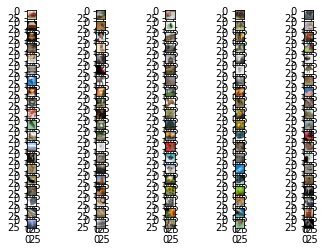

In [ ]:
for i in range(100):
  for j in range(50000):
    if y_train[j] == i:
      plt.subplot(20,5,i+1)
      plt.imshow(x_train[j])
      break

In [ ]:
print('Max x train is: ',np.max(x_train))
print('Min x train is: ',np.min(x_train))
print('Max x test is: ',np.max(x_test))
print('Min x test is: ',np.min(x_test))
print('Max y train is: ',np.max(y_train))
print('Min y train is: ',np.min(y_train))
print('Max y test is: ',np.max(y_test))
print('Min y test is: ',np.min(y_test))

Max x train is:  255
Min x train is:  0
Max x test is:  255
Min x test is:  0
Max y train is:  99
Min y train is:  0
Max y test is:  99
Min y test is:  0


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)
print("x train shape: ",x_train.shape)
print("y train shape: ",y_train.shape)
print("x test shape: ",x_test.shape)
print("y test shape: ",y_test.shape)
print("Max x train ",np.max(x_train))

x train shape:  (50000, 32, 32, 3)
y train shape:  (50000, 100)
x test shape:  (10000, 32, 32, 3)
y test shape:  (10000, 100)
Max x train  1.0


In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.layers import Flatten
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(16,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(100,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 2048)              8390656   
                                                                 
 dense_1 (Dense)             (None, 100)               204900    
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
782/782 [==============================] - 141s 180ms/step - loss: 2.9615 - accuracy: 0.2745 - val_loss: 2.7339 - val_accuracy: 0.3208
Epoch 2/20
782/782 [==============================] - 140s 179ms/step - loss: 2.3578 - accuracy: 0.3941 - val_loss: 2.6495 - val_accuracy: 0.3481
Epoch 3/20
782/782 [==============================] - 140s 179ms/step - loss: 1.8278 - accuracy: 0.5118 - val_loss: 2.6145 - val_accuracy: 0.3677
Epoch 4/20
782/782 [==============================] - 140s 179ms/step - loss: 1.2593 - accuracy: 0.6521 - val_loss: 2.7663 - val_accuracy: 0.3708
Epoch 5/20
782/782 [==============================] - 140s 179ms/step - loss: 0.7221 - accuracy: 0.7959 - val_loss: 3.2703 - val_accuracy: 0.3565
Epoch 6/20
782/782 [==============================] - 140s 179ms/step - loss: 0.3651 - accuracy: 0.8964 - val_loss: 3.7891 - val_accuracy: 0.3554
Epoch 7/20
782/782 [==============================] - 141s 180ms/step - loss: 0.2223 - accuracy: 0.9361 - val_loss: 4.3134 -

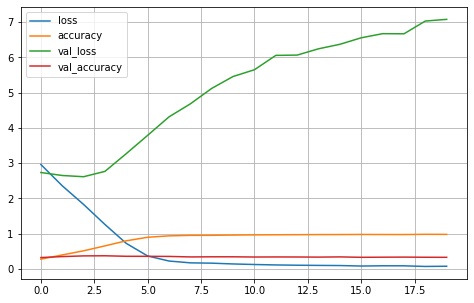

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


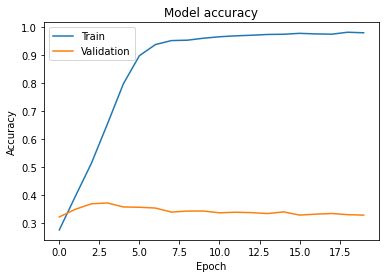

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test),verbose=1)
score = model.evaluate(x_test,y_test,verbose=0)
print("Error: ",score[0])
print("Accuracy: ",score[1])
model_json = model.to_json()
with open('drive/MyDrive/Model/Cifar100/cifar100_config.json','w') as file_json:
  file_json.write(model_json)
model.save_weights('drive/MyDrive/Model/Cifar100/cifar100_weights.h5')
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
print('\n')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

In [ ]:
label = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

['sweet_pepper', 'castle', 'bee', 'bicycle', 'bottle', 'mountain', 'clock', 'poppy', 'orange', 'raccoon', 'tiger']


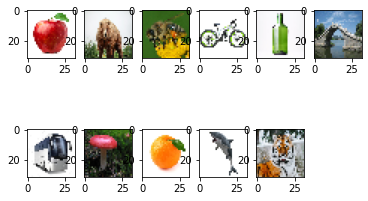

In [ ]:
from keras.preprocessing.image import load_img,img_to_array
pre = []
for i in range(11):
  url = 'drive/MyDrive/data_test/cifar100/test'+str(i)+'.jpg'
  test = load_img(url,target_size=(32,32))
  plt.subplot(2,6,i+1)
  plt.imshow(test)
  test = img_to_array(test)
  test = test.reshape(1,32,32,3)
  test = test.astype('float32')
  test = test/255.0
  #pre.append(int(np.argmax(model.predict(test))))
  pre.append(label[int(np.argmax(model.predict(test)))])
print(pre)

tiger


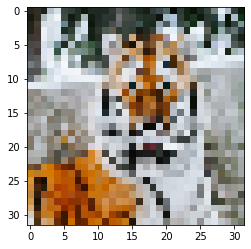

In [ ]:
url = 'drive/MyDrive/data_test/cifar100/test'+str(10)+'.jpg'
test = load_img(url,target_size=(32,32))
plt.imshow(test)
test = img_to_array(test)
test = test.reshape(1,32,32,3)
test = test.astype('float32')
test = test/255.0
print(label[int(np.argmax(model.predict(test)))])